In [1]:
from StarRotator import StarRotator
import matplotlib.pyplot as plt
import pickle
import numpy as np
from lib.solve import solve
from pysme.sme import SME_Structure as SME_Struct
from pysme.linelist.vald import ValdFile
from pysme.abund import Abund
import lib.operations as ops


In [2]:
with open('pickles/WASP189_Na.pkl', 'rb') as file:
    WASP189_Na = pickle.load(file)

t = 30
res = WASP189_Na.residual[t]
pos = np.sqrt(WASP189_Na.xp**2 + WASP189_Na.yp**2)
mu = np.sqrt(1-pos**2)
# mu = mu[t]
u1 = WASP189_Na.u1
u2 = WASP189_Na.u2
RpRs = WASP189_Na.Rp_Rs
Fs = WASP189_Na.stellar_spectrum
vel_star = WASP189_Na.vel_grid[(int)(
    WASP189_Na.yp[t]*400)+400, (int)(WASP189_Na.xp[t]*400)+400]
print(vel_star)
shift = ops.doppler(vel_star)
print(shift)
# wl = WASP189_Na.wl/1.00014
wl = WASP189_Na.wl/shift


# Add noise
R0 = res + np.random.normal(0, (1e-3)/6, len(res))
A = RpRs ** 2 * ((1-u1*(1-mu[t])-u2*(1-mu[t])**2)/(1-u1/3-u2/6))
B = 1 - A/Fs
R2 = (1-R0/B)/A * (Fs-A) + 1

# plt.figure()
# plt.plot()


42754.684200222146
1.0001426244463736


/tmp/ipykernel_1002204/1131757997.py:7: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-pos**2)


In [3]:

sme_fit = SME_Struct()
sme_fit.wran = [[WASP189_Na.wave_start*10, WASP189_Na.wave_end*10]]
vald = ValdFile("VALD_20220201_Na.dat")  # github or link to file
sme_fit.linelist = vald
sme_fit.abund = Abund.solar()
sme_fit.mu = [mu[t]-0.03, mu[t]+0.03]
sme_fit.atmo.method = 'grid'
sme_fit.atmo.source = 'atlas12.sav'
n = len(wl)
sme_fit.wave = (wl[::6]) * 10
sme_fit.spec = R2[::6]/np.median(R2)
sme_fit.uncs = (np.ones(sme_fit.spec.size) * 0.01)
p0 = np.array([WASP189_Na.T, WASP189_Na.logg, 7,
              sme_fit.abund["Na"], sme_fit.abund['Fe']])
print(p0)
fitparams = ["Teff", "logg", "vsini", "abund na", "abund fe"]

sme_fit = solve(sme_fit, fitparams, p0)


INFO - Loading VALD file VALD_20220201_Na.dat


The linelist extends far beyond the requested wavelength range. This will slow down the calculation, consider using only relevant lines
Wavelength range: 5875.925473310162 - 5902.382354695191 Å ; Linelist range: 5847.21641 - 5905.60157 Å


[7.995e+03 3.900e+00 7.000e+00 6.170e+00 7.450e+00]
INFO - No cconfiguration file found at /home/madeline/.sme/config.json, using default values instead
INFO - Don't forget to cite your sources. Use sme.citation()
INFO -    Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
INFO -        0              1         9.4551e+03                                    2.10e+03    
INFO -        1              2         9.3143e+03      1.41e+02       5.71e+01       3.16e+02    
INFO -        2              3         9.2984e+03      1.59e+01       5.87e+01       4.38e+02    
INFO -        3              4         9.2977e+03      7.20e-01       2.84e+01       4.74e+02    
INFO -        4             10         9.2974e+03      2.84e-01       1.15e-02       4.33e+02    
INFO -        5             11         9.2974e+03      0.00e+00       0.00e+00       4.33e+02    
INFO - `xtol` termination condition is satisfied.
INFO - Function evaluations 11, initial cost 9.455

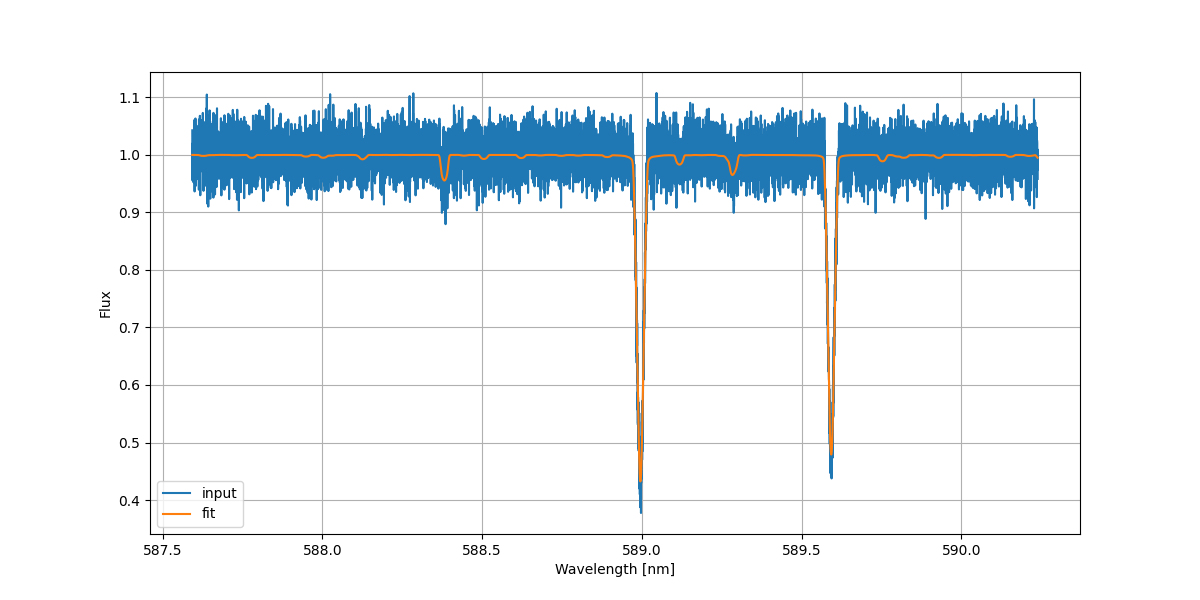

In [4]:
%matplotlib widget
plt.figure(figsize=(12, 6))
plt.plot(WASP189_Na.wl/shift, R2/np.median(R2), label="input")
plt.plot(np.asarray(sme_fit.wave)/10,
         np.asarray(sme_fit.synth), label="fit")
plt.legend()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()


In [2]:
with open('pickles/WASP189_blue.pkl', 'rb') as file:
    WASP189_blue = pickle.load(file)

t = 30
res = WASP189_blue.residual[t]
pos = np.sqrt(WASP189_blue.xp**2 + WASP189_blue.yp**2)
mu = np.sqrt(1-pos**2)
# mu = mu[t]
u1 = WASP189_blue.u1
u2 = WASP189_blue.u2
RpRs = WASP189_blue.Rp_Rs
Fs = WASP189_blue.stellar_spectrum
vel_star = WASP189_blue.vel_grid[(int)(
    WASP189_blue.yp[t]*400)+400, (int)(WASP189_blue.xp[t]*400)+400]
print(vel_star)
shift = ops.doppler(vel_star)
print(shift)
wl = WASP189_blue.wl/shift


# Add noise
# noise factor comes from wavelength range and 6^2 sqaures
R0 = res + np.random.normal(0, (1e-3)/6, len(res))
A = RpRs ** 2 * ((1-u1*(1-mu[t])-u2*(1-mu[t])**2)/(1-u1/3-u2/6))
B = 1 - A/Fs
R2 = (1-R0/B)/A * (Fs-A) + 1


42754.684200222146
1.0001426244463736


/tmp/ipykernel_3032676/2928997159.py:7: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-pos**2)


In [48]:
sme_fit = SME_Struct()
sme_fit.wran = [[WASP189_blue.wave_start*10, WASP189_blue.wave_end*10]]
vald = ValdFile("VALD_20220201_blue.dat")  # github or link to file
sme_fit.linelist = vald
sme_fit.abund = Abund.solar()
sme_fit.mu = [mu[t]-0.03, mu[t]+0.03]
sme_fit.atmo.method = 'grid'
sme_fit.atmo.source = 'atlas12.sav'
n = len(wl)
sme_fit.wave = (wl[::6]) * 10
sme_fit.spec = R2[::6]/np.median(R2)
sme_fit.uncs = (np.ones(sme_fit.spec.size) * 0.01)
p0 = np.array([WASP189_blue.T, WASP189_blue.logg, 7,
              sme_fit.abund['Fe'], sme_fit.abund['Ni'], sme_fit.abund["Ti"], sme_fit.abund["Cr"], sme_fit.abund["Ca"]])
print(p0)
fitparams = ["Teff", "logg", "vsini", "abund fe",
             "abund ni", "abund ti", "abund cr", "abund ca"]

sme_fit = solve(sme_fit, fitparams, p0)


INFO - Loading VALD file VALD_20220201_blue.dat
[7.995e+03 3.900e+00 7.000e+00 7.450e+00 6.230e+00 4.900e+00 5.640e+00
 6.310e+00]
INFO - No cconfiguration file found at /home/madeline/.sme/config.json, using default values instead
INFO - Don't forget to cite your sources. Use sme.citation()
INFO -    Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
INFO -        0              1         5.9373e+04                                    6.51e+03    
INFO -        1              2         5.8232e+04      1.14e+03       1.88e+02       4.13e+03    
INFO -        2              3         5.8227e+04      5.27e+00       8.13e+01       4.63e+03    
INFO -        3              4         5.8191e+04      3.54e+01       2.03e+01       3.96e+03    
INFO -        4             10         5.8191e+04      0.00e+00       0.00e+00       3.96e+03    
INFO - `xtol` termination condition is satisfied.
INFO - Function evaluations 10, initial cost 5.9373e+04, final cost 5

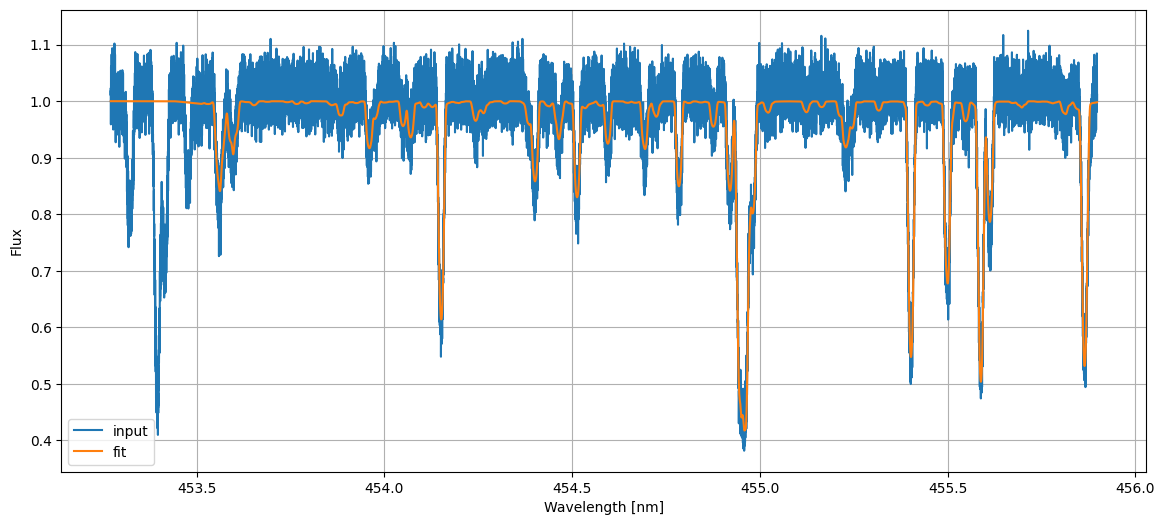

In [49]:
plt.figure(figsize=(14, 6))
plt.plot(WASP189_blue.wl/shift, R2/np.median(R2), label="input")
plt.plot(np.asarray(sme_fit.wave)/10,
         np.asarray(sme_fit.synth), label="fit")
plt.legend()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()


/tmp/ipykernel_848173/1886559556.py:4: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-pos**2)


INFO - Loading VALD file VALD_20220201_blue.dat
INFO - No cconfiguration file found at /home/madeline/.sme/config.json, using default values instead
INFO - Don't forget to cite your sources. Use sme.citation()
INFO -    Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
INFO -        0              1         6.1429e+04                                    6.16e+03    
INFO -        1              2         6.0410e+04      1.02e+03       2.14e+02       4.59e+03    
INFO -        2             11         6.0410e+04      0.00e+00       0.00e+00       4.59e+03    
INFO - `xtol` termination condition is satisfied.
INFO - Function evaluations 11, initial cost 6.1429e+04, final cost 6.0410e+04, first-order optimality 4.59e+03.
teff      	8209.42504 +- 75.754
logg      	4.32901 +- 0.11041
vsini     	6.34133 +- 0.088188
Abund fe  	7.48393 +- 0.038133
Abund ni  	6.19287 +- 0.09679
Abund ti  	5.10576 +- 0.051525
Abund cr  	5.75169 +- 0.044991
Abund ca  	4.88227 

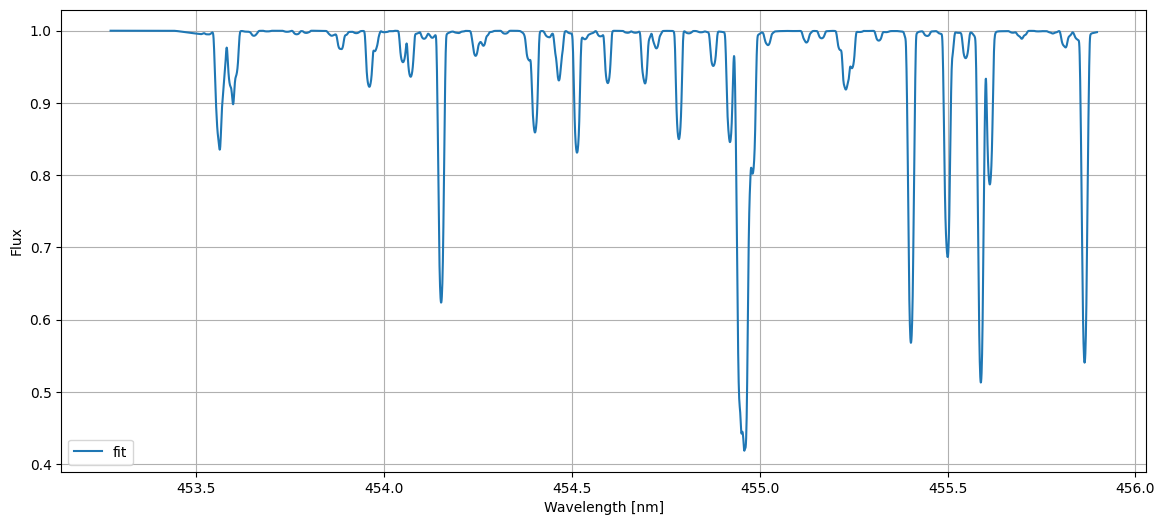

In [5]:
later = res_model(WASP189_blue, "VALD_20220201_blue.dat", 30)
plt.figure(figsize=(14, 6))
plt.plot(np.asarray(later.wave)/10,
         np.asarray(later.synth), label="fit")
plt.legend()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()


In [11]:
from pysme.gui import plot_plotly
fig = plot_plotly.FinalPlot(sme_fit)


In [2]:
def res_model(SR_obj, ll, t):
    res = SR_obj.residual[t]
    pos = np.sqrt(SR_obj.xp**2 + SR_obj.yp**2)
    mu = np.sqrt(1-pos**2)
    u1 = SR_obj.u1
    u2 = SR_obj.u2
    RpRs = SR_obj.Rp_Rs
    Fs = SR_obj.stellar_spectrum
    xp = (SR_obj.xp[t]*400)+400
    yp = (SR_obj.yp[t]*400)+400
    vel_star = SR_obj.vel_grid[(int)(yp), (int)(xp)]
    shift = ops.doppler(vel_star)
    wl = SR_obj.wl/shift

    # Add noise
    noise_level = (1e-3)/6
    R0 = res + np.random.normal(0, noise_level, len(res))
    A = RpRs ** 2 * ((1-u1*(1-mu[t])-u2*(1-mu[t])**2)/(1-u1/3-u2/6))
    B = 1 - A/Fs
    R2 = (1-R0/B)/A * (Fs-A) + 1

    # Fit with pysme
    sme_fit = SME_Struct()
    sme_fit.wran = [[SR_obj.wave_start*10, SR_obj.wave_end*10]]
    vald = ValdFile(ll)  # github or link to file
    sme_fit.linelist = vald
    sme_fit.abund = Abund.solar()
    sme_fit.mu = [mu[t]-0.03, mu[t]+0.03]
    sme_fit.atmo.method = 'grid'
    sme_fit.atmo.source = 'atlas12.sav'
    n = len(wl)
    sme_fit.wave = (wl[::6]) * 10
    sme_fit.spec = R2[::6]/np.median(R2)
    sme_fit.uncs = (np.ones(sme_fit.spec.size) * noise_level)
    p0 = np.array([SR_obj.T, SR_obj.logg, 7,
                   sme_fit.abund['Fe'], sme_fit.abund['Ni'], sme_fit.abund["Ti"], sme_fit.abund["Cr"], sme_fit.abund["Ca"]])
    fitparams = ["Teff", "logg", "vsini", "abund fe",
                 "abund ni", "abund ti", "abund cr", "abund ca"]

    sme_fit = solve(sme_fit, fitparams, p0)
    return sme_fit


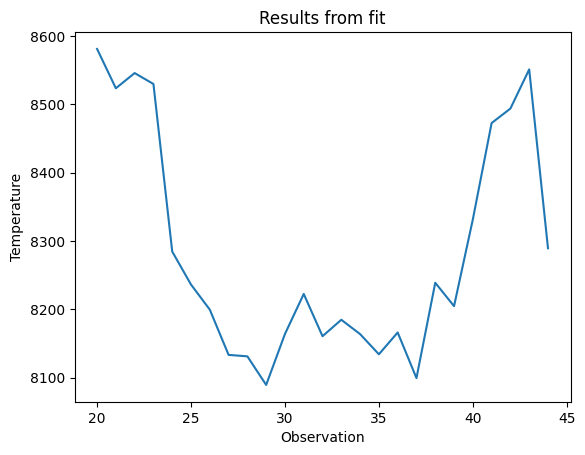

In [17]:
plt.figure()
plt.plot(times, temps)
plt.xlabel('Observation')
plt.ylabel('Temperature')
plt.title('Results from fit')
plt.show()


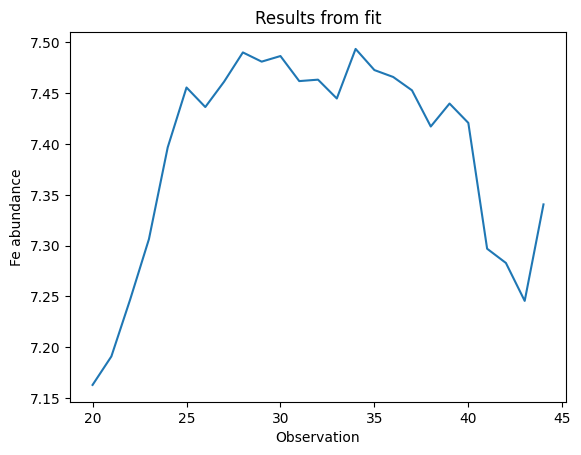

In [7]:
plt.figure()
plt.plot(times, fe)
plt.xlabel('Observation')
plt.ylabel('Fe abundance')
plt.title('Results from fit')
plt.show()


In [6]:
with open('pickles/WASP189_blue.pkl', 'rb') as file:
    WASP189_blue = pickle.load(file)


def calculate_transit_times(SR_obj):
    pos = np.sqrt(SR_obj.xp**2 + SR_obj.yp**2)
    mu = np.sqrt(1-pos**2)
    mu_angles = mu
    mu_angles[np.isnan(mu_angles)] = 1
    transit = mu_angles.copy()
    transit[transit == 1] = 0
    transit[transit != 0] = 1
    times = np.argwhere(transit == 1)

    return times


In [7]:
def integrate_obs_spectrum(SR_obj, noise_level):
    times = calculate_transit_times(SR_obj)

    # Calculate total area integrated over
    xp = SR_obj.xp[times]
    yp = SR_obj.yp[times]
    r = np.sqrt(xp**2+yp**2)
    r_max = r + SR_obj.Rp_Rs
    r_max[r_max > 1] = 1
    r_min = r - SR_obj.Rp_Rs
    area = np.pi*np.sum(r_max**2-r_min**2)

    # weight
    w = 1/area

    I0 = 0
    n = len(times)
    wl_grid = SR_obj.wl[::6]
    R2_result = 0
    for t in times:
        t = (int)(t)
        res = SR_obj.residual[t]
        r = np.sqrt(SR_obj.xp[t]**2 + SR_obj.yp[t]**2)
        r_max = r + SR_obj.Rp_Rs
        r_min = r - SR_obj.Rp_Rs
        if r_max > 1:
            r_max = 1
        area_t = (np.pi*(r_max**2 - r_min**2))

        mu = np.sqrt(1-r**2)
        u1 = SR_obj.u1
        u2 = SR_obj.u2
        RpRs = SR_obj.Rp_Rs
        Fs = SR_obj.stellar_spectrum

        # Limb-darkening
        I = 1-u1*(1-mu)-u2*(1-mu)**2
        I0 += I

        # Shift wavelength according to Doppler shift
        xp = (SR_obj.xp[t]*400)+400
        yp = (SR_obj.yp[t]*400)+400
        vel_star = SR_obj.vel_grid[(int)(yp), (int)(xp)]
        shift = ops.doppler(vel_star)
        wl = SR_obj.wl/shift

        # Add noise
        R0 = res + np.random.normal(0, noise_level, len(res))
        A = RpRs ** 2 * ((1-u1*(1-mu)-u2*(1-mu)**2)/(1-u1/3-u2/6))
        B = 1 - A/Fs
        R2 = ((1-R0/B)/A * (Fs-A) + 1)
        R2 /= np.median(R2)
        R2 *= area_t*w*I

        # interpolate star onto same wavelength axis
        R2_int = np.interp(wl_grid, wl, R2)
        R2_result += R2_int

    R2_result /= I0
    R2_result *= n

    return wl_grid, R2_result


/tmp/ipykernel_3032676/1925837939.py:7: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-pos**2)


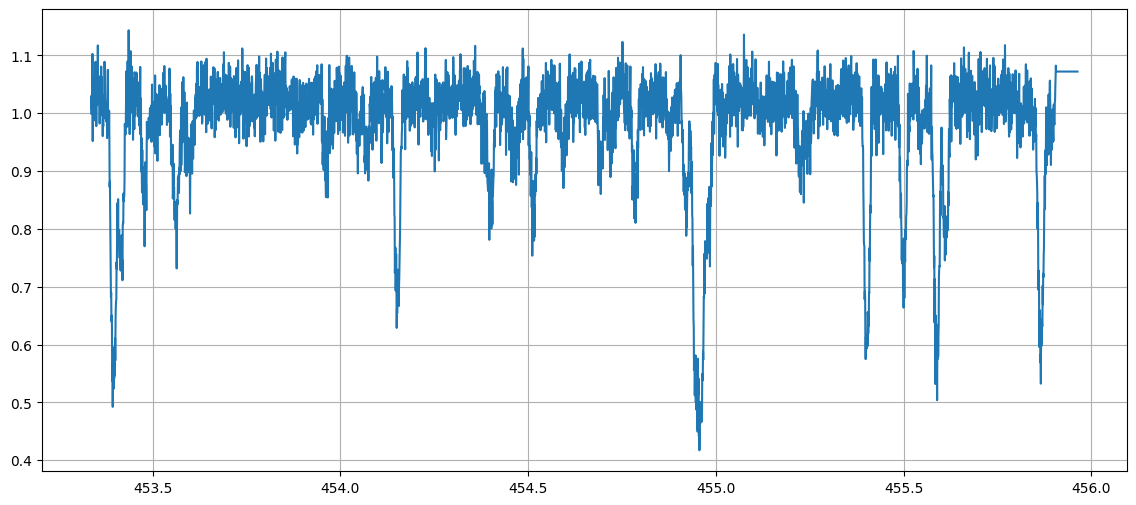

In [8]:
noise_level = (1e-3)
wl_grid, R2 = integrate_obs_spectrum(WASP189_blue, noise_level)

plt.figure(figsize=(14, 6))
plt.plot(wl_grid, R2)
plt.grid()
plt.show()


In [10]:
def fit_spectrum(wl, R2, SR_obj, ll, noise_level):
    sme_fit = SME_Struct()
    sme_fit.wran = [[SR_obj.wave_start*10, SR_obj.wave_end*10]]
    vald = ValdFile(ll)  # github or link to file
    sme_fit.linelist = vald
    sme_fit.abund = Abund.solar()

    pos = np.sqrt(SR_obj.xp**2 + SR_obj.yp**2)
    mu_max = np.nanmax(np.sqrt(1-pos**2))

    sme_fit.mu = [0, mu_max+0.03]
    sme_fit.atmo.method = 'grid'
    sme_fit.atmo.source = 'atlas12.sav'

    sme_fit.wave = wl * 10
    sme_fit.spec = R2
    sme_fit.uncs = (np.ones(sme_fit.spec.size) * noise_level)
    p0 = np.array([SR_obj.T, SR_obj.logg, 7,
                   sme_fit.abund['Fe'], sme_fit.abund['Ni'], sme_fit.abund["Ti"], sme_fit.abund["Cr"], sme_fit.abund["Ca"]])
    print(p0)
    fitparams = ["Teff", "logg", "vsini", "abund fe",
                 "abund ni", "abund ti", "abund cr", "abund ca"]

    sme_fit = solve(sme_fit, fitparams, p0)
    return sme_fit


In [11]:
sme_fit = fit_spectrum(wl_grid, R2, WASP189_blue,
                       "VALD_20220201_blue.dat", noise_level)
print(sme_fit.fitresults.values)
print(sme_fit.fitresults.fit_uncertainties)


INFO - Loading VALD file VALD_20220201_blue.dat


/tmp/ipykernel_3032676/3450153890.py:9: RuntimeWarning: invalid value encountered in sqrt
  mu_max = np.nanmax(np.sqrt(1-pos**2))


[7.995e+03 3.900e+00 7.000e+00 7.450e+00 6.230e+00 4.900e+00 5.640e+00
 6.310e+00]
INFO - No cconfiguration file found at /home/madeline/.sme/config.json, using default values instead
INFO - Don't forget to cite your sources. Use sme.citation()
INFO -    Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
INFO -        0              1         6.8166e+06                                    2.13e+06    
INFO -        1              2         6.1453e+06      6.71e+05       4.02e+02       6.43e+05    
INFO -        2             11         6.1453e+06      0.00e+00       0.00e+00       6.43e+05    
INFO - `xtol` termination condition is satisfied.
INFO - Function evaluations 11, initial cost 6.8166e+06, final cost 6.1453e+06, first-order optimality 6.43e+05.
teff      	8397.42202 +- 72.005
logg      	4.79965 +- 0.10079
vsini     	8.24426 +- 0.12526
Abund fe  	7.44644 +- 0.040278
Abund ni  	6.25059 +- 0.099559
Abund ti  	5.23141 +- 0.049326
Abund cr  	5.74

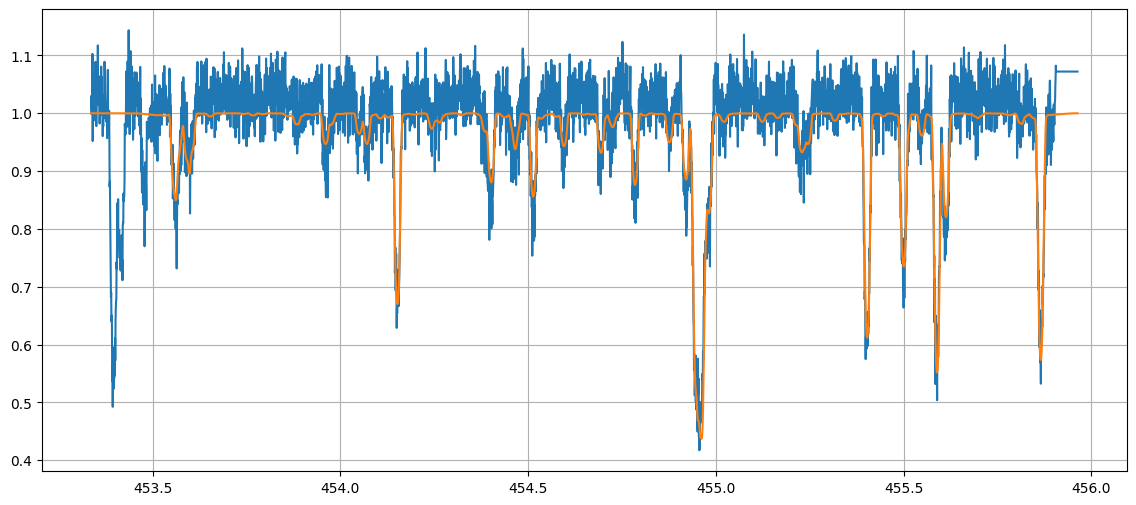

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(wl_grid, R2)
plt.plot(np.asarray(sme_fit.wave)/10,
         np.asarray(sme_fit.synth), label="fit")
plt.grid()
plt.show()


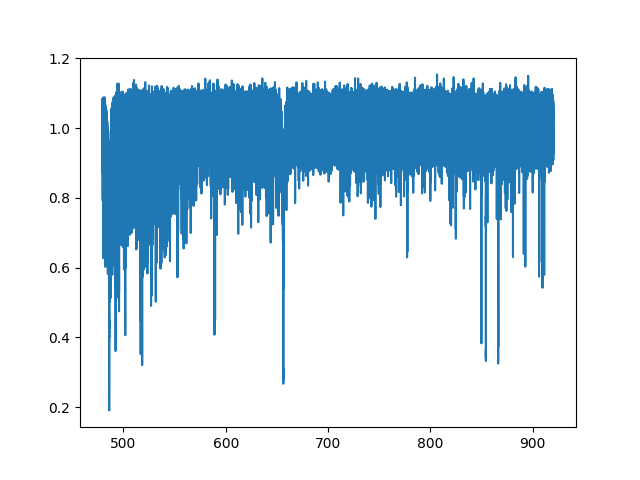

In [16]:
%matplotlib widget

MAROONX_lines = np.load('MAROONX_lines.npy')
# n = (int)(len(MAROONX_lines)/2)
wl = MAROONX_lines[0, :]
R2 = MAROONX_lines[1, :]


plt.figure()
plt.plot(wl, R2)
plt.show()
